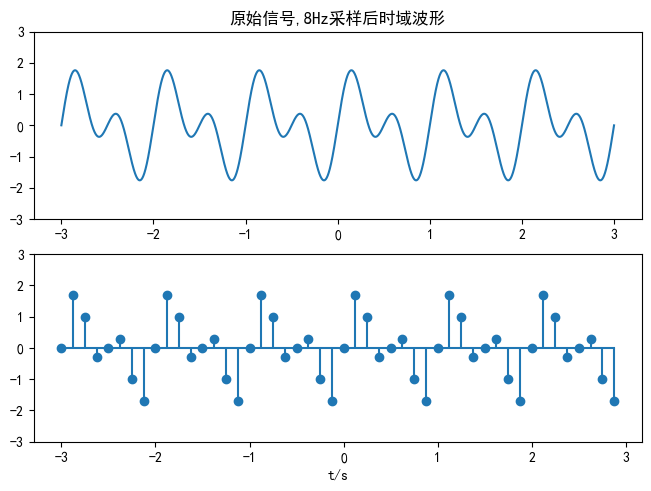

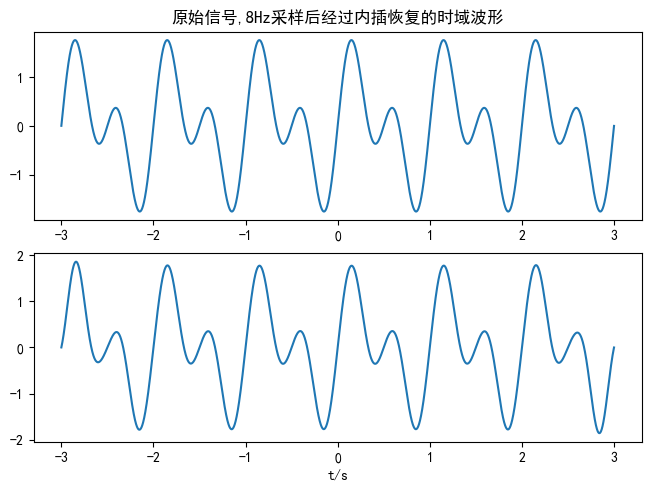

In [1]:
#导入使用的库
import numpy as np;from math import *
from scipy import fft
import matplotlib.pyplot as plt

def signfunc(f): #定义信号函数
    f1 = 1;f2 = 2
    t = np.arange(-3,3,1/f)
    return t,np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)
    
#原始信号
fa = 10000;ta,xa = signfunc(fa);N = len(xa)
#对原始信号进行采样
fs1 = 8
t1,x_hat1 = signfunc(fs1)

#内插恢复函数
def interp_rec(samp_sign,t,ts,fs):
    t = t-1e-10 #防止出现分母为0的情况
    t = t.reshape(1,-1);ts = ts.reshape(-1,1)
    th = t-ts;hn = np.sin(pi*fs*th)/(pi*fs*th)
    return np.dot(samp_sign,hn)

x_hat1_rec = interp_rec(x_hat1,ta,t1,fs1)

#绘制原信号及各采样信号的时域波形
fig,ax = plt.subplots(2,1,constrained_layout=True)
ax[0].plot(ta,xa);ax[1].stem(t1,x_hat1,basefmt="")
ax[0].set_ylim([-3,3]);ax[1].set_ylim([-3,3])
ax[0].set_title('原始信号,8Hz采样后时域波形')
ax[1].set_xlabel('t/s')

#绘制原信号及各采样信号恢复后的时域波形
fig,ax = plt.subplots(2,1,constrained_layout=True)
ax[0].plot(ta,xa);ax[1].plot(ta,x_hat1_rec)
ax[0].set_title('原始信号,8Hz采样后经过内插恢复的时域波形')
ax[1].set_xlabel('t/s')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号